In [1]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv("fake_or_real_news (1).csv")

In [5]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [8]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [11]:
data.replace({"REAL":1,"FAKE":0},inplace=True)

In [12]:
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [13]:
import seaborn as sns

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
def countlabel(data):
    sns.countplot(x="label",data=data)
    

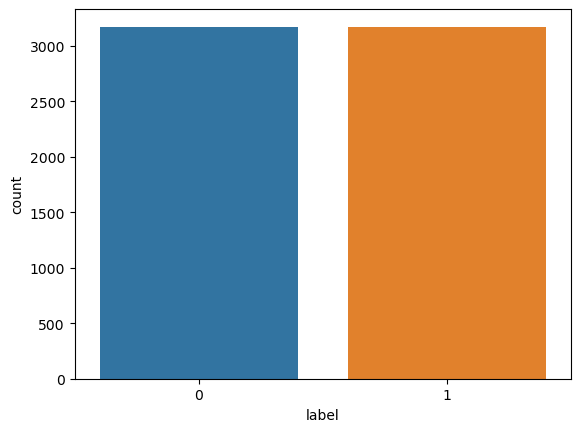

In [15]:
countlabel(data)

In [16]:
data.dropna(inplace=True)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vec=TfidfVectorizer(ngram_range=(2,2))

In [20]:
X_title=data["title"]

In [21]:
X_title

0                            You Can Smell Hillary’s Fear
1       Watch The Exact Moment Paul Ryan Committed Pol...
2             Kerry to go to Paris in gesture of sympathy
3       Bernie supporters on Twitter erupt in anger ag...
4        The Battle of New York: Why This Primary Matters
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 6335, dtype: object

In [23]:
X_title_vec=vec.fit_transform(X_title)

In [24]:
X_title_vec

<6335x41827 sparse matrix of type '<class 'numpy.float64'>'
	with 58821 stored elements in Compressed Sparse Row format>

In [25]:
X_title_vec.shape

(6335, 41827)

In [42]:
y=data["label"]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(X_title_vec,y)

In [47]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr=LogisticRegression()

In [52]:
lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
predictions=lr.predict(x_test)

In [54]:
predictions

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
cm=confusion_matrix(predictions,y_test)

<AxesSubplot:>

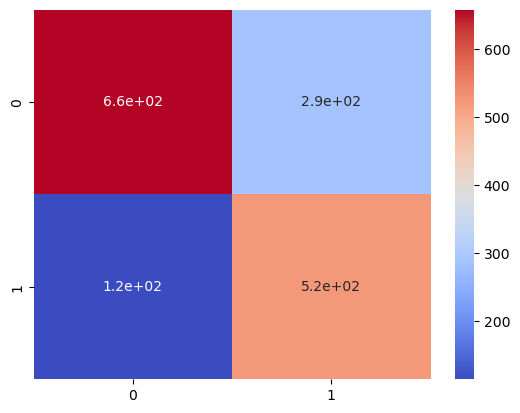

In [58]:
sns.heatmap(cm,annot=True,cmap='coolwarm')

In [63]:
def predict_fake_or_not(headlines):
    res=[]
    res.append(headlines)
    x_headlines=vec.transform(res)
    a=lr.predict(x_headlines)
    if(a[0]==0):
        print("The headlines sounds fake")
    else:
        print("The headlines is true")
    

In [65]:
predict_fake_or_not("The oil prices are rising")

The headlines is true
